### Use your function on multiple images and argue why the effect is more on some images while it is not that apparent on the others.

In [34]:
%matplotlib inline

import cv2
import numpy
from matplotlib import pyplot as plt
from PIL import Image

In [35]:
image = './DIP_2019_A1/q2_4.jpg'

In [36]:
def linContrastStretching(i, a, b):
    img = cv2.imread(i, 0)
    hist1 = cv2.calcHist([img],[0],None,[256],[0,256]) 
    
#     plt.plot(hist1) 
#     plt.show()
    
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(img)
    
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            img[i,j] = numpy.uint8(a + (b-a)*(img[i,j] - minVal)/(maxVal - minVal))
            
    res = Image.fromarray(img, 'L')
    
    hist2 = cv2.calcHist([img],[0],None,[256],[0,256])
    
#     plt.plot(hist2) 
#     plt.show()
    
    return res

In [37]:
a = linContrastStretching(image, 0, 255)

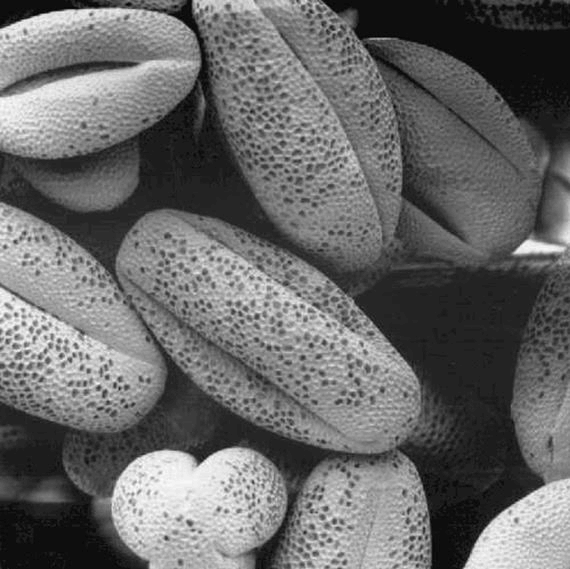

In [38]:
a

- The algorithm fails on some cases. Those cases include images with when there is pixel intensity 0 and 255 are present in the image. 
- Because when pixel intensities 0 and 255 are present in an image, then in that case they become the minimum and maximum pixel intensity which ruins the formula.
- That means the output image is equal to the processed image. That means there is no effect of histogram stretching has been done at this image.